In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [4]:
import evaluation_metrics as em
# from MM_Models import ModeMask
import MM_Plot_Utils as mmp
from MM_Traj_Utils import NewMaze, LoadTraj, LoadTrajFromPath, SplitModeClips, NewNodes4
import parameters as p
import utils as u

In [1]:
from scipy import special

In [2]:
ma = NewMaze(6)

NameError: name 'NewMaze' is not defined

In [6]:
rew_animal_data = u.RewardedAnimalData()
unrew_animal_data = u.UnrewardedAnimalData()

In [7]:
# unrewarded animals - exploration initial and later

le = 6
animal_tfs = unrew_animal_data.get_data_all()

In [13]:
from BaseModel import BaseModel

In [15]:
bm = BaseModel()
nodemap = bm.get_SAnodemap()

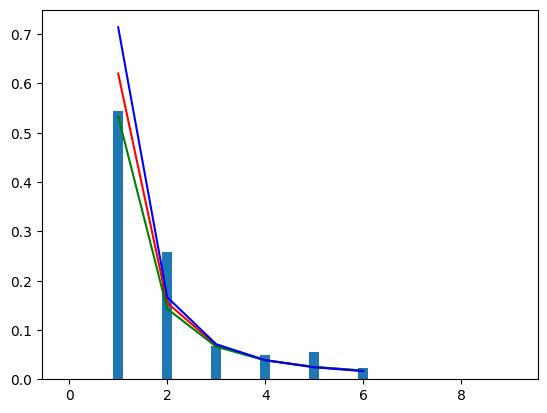

In [70]:
tf = animal_tfs[0]

step_lengths = []
for bout in tf.no:
    b = bout[:, 0]
    prev_dir = None
    new_dir = None
    s = 0
    for i, j in zip(b[1:], b[2:]):
        if j == nodemap[i, 0]:
            new_dir = 'go_back'
        elif (j == nodemap[i, 1]) or (j == nodemap[i, 2]):
            new_dir = 'go_fwd'
        if prev_dir is None:
            s += 1
        elif prev_dir == new_dir:
            s += 1
        else:
            step_lengths.append(s)
            s = 1
        prev_dir = new_dir

x = np.arange(1., 7.)
y = 0.4 * x**(-2) / special.zetac(2)
plt.plot(x, y, 'r-')

y = 0.4 * x**(-1.9) / special.zetac(1.9)
plt.plot(x, y, 'g-')

y = 0.4 * x**(-2.1) / special.zetac(2.1)
plt.plot(x, y, 'b-')

bins = np.arange(11) - 0.5
weights = np.ones_like(step_lengths) / len(step_lengths)

n, bins, edges = plt.hist(step_lengths, bins=bins, weights=weights, rwidth=0.2)